<a href="https://colab.research.google.com/github/architvasan/MortgageCalc/blob/main/Mortgage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
class Mortgage():
    """
    Mortgage scheduler class
    params:
        T_o: total price
        d: downpayment percent
        R: annual interest rate
        N: number of years
        buy_down: 2-1 plan (2% reduction for 1st, then 1% for second year, then regular)
        buy_down price: how much do we need to contribute into the total price to get the buydown
        hoa: price per year
    """
    def __init__(self,
                 T_o,
                 d,
                 R,
                 N,
                 hoa=700,
                 taxrate=0.01,
                 insurance=2000,
                buy_down=False,
                buy_down_price = 0):
        self.D = (T_o+buy_down_price) * d
        self.P_o = T_o + buy_down_price - self.D
        self.r = R/12
        self.n = N * 12
        self.buy_down = buy_down
        self.hoa_m = hoa/12 # per month hoa cost
        self.tax_m = (taxrate/12) * (T_o + buy_down_price) # tax amount per month
        self.insurance_m = insurance/12 # insurance amount
    def monthly(self):
        M = self.P_o * (self.r*(1+self.r)**self.n)/((1+self.r)**self.n-1)
        self.M = M
        return self.M + self.tax_m + self.insurance_m + self.hoa_m
    def princ_timeline(self, A):
        interest_timeline = []
        P_n_arr = []
        P_n_arr.append(self.P_o)
        for n_it in range(1, self.n):
            if n_it==1 and self.buy_down == True:
                self.r -=(0.02/12)
                print(self.r)
            elif n_it==12 and self.buy_down == True:
                self.r+=(0.01/12)
                print(self.r)
            elif n_it==24 and self.buy_down == True:
                self.r+=(0.01/12)
                print(self.r)
            self.monthly()
            interest_n_it = P_n_arr[n_it - 1] * self.r
            Pn_it = P_n_arr[n_it - 1]*(1+self.r) - self.M
            interest_timeline.append(interest_n_it)
            if n_it %12 ==0:
                Pn_it-=A
            P_n_arr.append(Pn_it)
            if Pn_it<=0:
                return n_it/12, P_n_arr, interest_timeline
        return n_it/12, P_n_arr, interest_timeline

In [5]:
class Mortgage_fixed_monthly():
    """
    Mortgage scheduler class
    params:
        T_o: total price
        d: downpayment percent
        R: annual interest rate
        N: number of years
        buy_down: 2-1 plan (2% reduction for 1st, then 1% for second year, then regular)
        buy_down price: how much do we need to contribute into the total price to get the buydown
        hoa: price per year
    """
    def __init__(self,
                 T_o,
                 d,
                 R,
                 N,
                 hoa=700,
                 taxrate=0.01,
                 insurance=2000,
                buy_down=False,
                buy_down_price = 0):
        self.D = (T_o+buy_down_price) * d
        self.P_o = T_o + buy_down_price - self.D
        self.r = R/12
        self.n = N * 12
        self.buy_down = buy_down
        self.hoa_m = hoa/12 # per month hoa cost
        self.tax_m = (taxrate/12) * (T_o + buy_down_price) # tax amount per month
        self.insurance_m = insurance/12 # insurance amount
    def monthly(self):
        M = self.P_o * (self.r*(1+self.r)**self.n)/((1+self.r)**self.n-1)
        self.M = M
        return self.M + self.tax_m + self.insurance_m + self.hoa_m
    def princ_timeline(self, A):
        self.monthly()
        interest_timeline = []
        P_n_arr = []
        P_n_arr.append(self.P_o)
        for n_it in range(1, self.n):
            if n_it==1 and self.buy_down == True:
                self.r -=(0.02/12)
                print(self.r)
            elif n_it==12 and self.buy_down == True:
                self.r+=(0.01/12)
                print(self.r)
            elif n_it==24 and self.buy_down == True:
                self.r+=(0.01/12)
                print(self.r)
            #self.monthly()
            interest_n_it = P_n_arr[n_it - 1] * self.r
            Pn_it = P_n_arr[n_it - 1]*(1+self.r) - self.M
            interest_timeline.append(interest_n_it)
            if n_it %12 ==0:
                Pn_it-=A
            P_n_arr.append(Pn_it)
            if Pn_it<=0:
                return n_it/12, P_n_arr, interest_timeline
        return n_it/12, P_n_arr, interest_timeline

## Comparisons
### Setting objects for mortgages

Fixed monthly, 0.2 down, 2-1 buydown





In [18]:
T_o = 630000
d = 0.2
R = 0.07
N = 30
buy_down=True
buy_down_price = 5000
mortgage_2_1_fixed = Mortgage_fixed_monthly(T_o, d, R, N, buy_down=buy_down, buy_down_price=buy_down_price)

Different monthly, 0.2 down, 2-1 buydown

In [19]:
T_o = 630000
d = 0.2
R = 0.07
N = 30
buy_down=True
buy_down_price = 5000
mortgage_2_1_diff = Mortgage(T_o, d, R, N, buy_down=buy_down, buy_down_price=buy_down_price)

Fixed, 0.2 down, no buydown

In [20]:
T_o = 630000
d = 0.2
R = 0.07
N = 30
buy_down=False
buy_down_price = 0
mortgage_no2_1 = Mortgage_fixed_monthly(T_o, d, R, N, buy_down=buy_down, buy_down_price=buy_down_price)

### Get mortgage timelines

Fixed monthly, 0.2 down, 2-1 buydown

In [22]:
p_time_fixed_0p2_buyd = {'0': [], '10000': [], '20000': []}
for inj in [0, 10000, 20000]:
  p_time_fixed_0p2_buyd[f'{inj}'] = mortgage_2_1_fixed.princ_timeline(inj)

0.004166666666666667
0.005
0.005833333333333334
0.004166666666666667
0.005
0.005833333333333334
0.004166666666666667
0.005
0.005833333333333334


Different monthly, 0.2 down, 2-1 buydown

In [21]:
p_time_diff_0p2_buyd = {'0': [], '10000': [], '20000': []}
for inj in [0, 10000, 20000]:
  p_time_diff_0p2_buyd[f'{inj}'] = mortgage_2_1_diff.princ_timeline(inj)

0.004166666666666667
0.005
0.005833333333333334
0.004166666666666667
0.005
0.005833333333333334
0.004166666666666667
0.005
0.005833333333333334


0.2 down, no 2-1 buydown

In [24]:
p_time_0p2_nobuydown = {'0': [], '10000': [], '20000': []}
for inj in [0, 10000, 20000]:
  p_time_0p2_nobuydown[f'{inj}'] = mortgage_no2_1.princ_timeline(inj)

In [26]:
p_time_0p2_nobuydown['0']

(29.916666666666668,
 [504000.0,
  503586.87542429694,
  503171.34095523565,
  502753.3825351048,
  502332.98602418986,
  501910.1372002946,
  501484.8217582599,
  501057.02530948,
  500626.7333814156,
  500193.93141710415,
  499758.60477466753,
  499320.7387268167,
  498880.3184603534,
  498437.3290756691,
  497991.7555862408,
  497543.58291812416,
  497092.7959094435,
  496639.3793098789,
  496183.31778015016,
  495724.595891498,
  495263.198125162,
  494799.1088718557,
  494332.3124312385,
  493862.7930113843,
  493390.5347282477,
  492915.5216051261,
  492437.73757211963,
  491957.1664655873,
  491473.79202760017,
  490987.5979053915,
  490498.5676508032,
  490006.6847197298,
  489511.9324715585,
  489014.2941686062,
  488513.7529755534,
  488010.2919588744,
  487503.8940862648,
  486994.54222606495,
  486482.2191466806,
  485966.90751599986,
  485448.58990080684,
  484927.2487661918,
  484402.86647495825,
  483875.4252870258,
  483344.9073588304,
  482811.2947427205,
  482274.5693

Compare total interests between three plans with no injections

In [27]:
"""
No 2-1 buydown
"""
interest_tot_no21 = np.sum(p_time_0p2_nobuydown['0'][2])

"""
2-1 buydown, fixed monthly
"""
interest_tot_21_fixed = np.sum(p_time_fixed_0p2_buyd['0'][2])

"""
2-1 buydown, different monthly
"""
interest_tot_21_diff = np.sum(p_time_diff_0p2_buyd['0'][2])

In [29]:
print(f"Comparisons of interest \n"+\
      f"No 2-1: \t {interest_tot_no21} \n"+\
      f"2-1, fixed : \t {interest_tot_21_fixed} \n"+\
      f"2-1, diff: \t {interest_tot_21_diff} \n")

Comparisons of interest 
No 2-1: 	 703105.4007974395 
2-1, fixed : 	 609434.2676667201 
2-1, diff: 	 674486.8700736817 



Plotting principal timeline for 2-1 with fixed/diff monthly

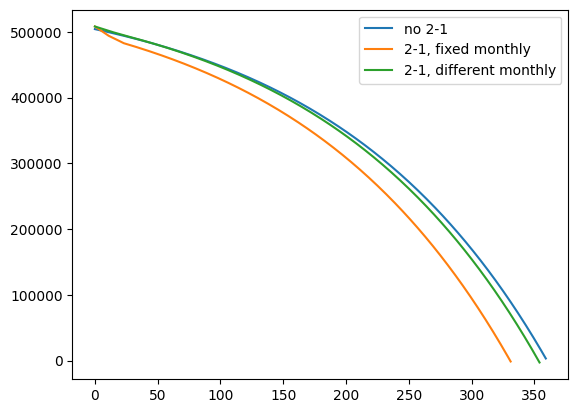

In [32]:
plt.plot(p_time_0p2_nobuydown['0'][1], label='no 2-1')
plt.plot(p_time_fixed_0p2_buyd['0'][1], label='2-1, fixed monthly')
plt.plot(p_time_diff_0p2_buyd['0'][1], label='2-1, different monthly')
plt.legend()